In [1]:
#import what's needed to explore and plot
import pandas as pd
import geopandas as gpd
import matplotlib as plt

In [2]:
#create geopandas dataframe with shape file
map_data = gpd.read_file('data/GIS_Maps/Regions.shp')
map_data.head()

,Region_Cod,Region_Nam,geometry
0,06,Pwani,"MULTIPOLYGON (((39.32538 -8.29178, 39.32574 -8..."
1,24,Simiyu,"POLYGON ((33.91068 -2.17986, 33.91654 -2.18068..."
2,25,Geita,"MULTIPOLYGON (((31.81682 -2.69945, 31.81540 -2..."
3,13,Singida,"POLYGON ((34.92725 -4.26445, 34.92725 -4.26445..."
4,11,Iringa,"POLYGON ((34.93466 -6.88891, 34.93743 -6.88938..."


In [3]:
#import the labels data
df = pd.read_csv('notebooks/training_set_labels', index_col=0)
df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
#import training data set
df2 = pd.read_csv('notebooks/training_set_values', index_col=0)
df2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
#import some additional packages
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

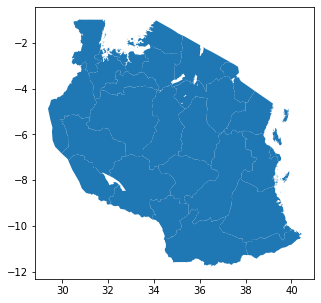

In [6]:
#map of Tanzania!  Created from the geopandas dataframe
fig,ax = plt.subplots(figsize=(5,5))
map_data.plot(ax=ax);

In [8]:
#create the point data to map locations of wells using lat and long from training data
geometry = [Point(xy) for xy in zip(df2['longitude'], df2['latitude'])]
geometry[:5]

In [9]:
#add the point data to the geo dataframe
crs = {'init': 'epsg:4324'}
geo_df = gpd.GeoDataFrame(df2,
                          crs = crs,
                          geometry=geometry)
geo_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,geometry
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,POINT (34.93809 -9.85632)
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,POINT (34.69877 -2.14747)
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,POINT (37.46066 -3.82133)
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,POINT (38.48616 -11.15530)
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,POINT (31.13085 -1.82536)


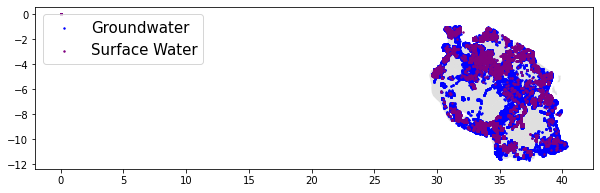

In [13]:
#time to plot!
fig,ax = plt.subplots(figsize = (10,10))
map_data.plot(ax=ax, alpha = .25, color = 'grey')
geo_df[geo_df['source_class']== 'groundwater'].plot(ax = ax, markersize = 2, color='blue', marker = 'o',label = 'Groundwater')
geo_df[geo_df['source_class']== 'surface'].plot(ax=ax,markersize=2,color='purple', marker = 'o',label = 'Surface Water')
plt.legend(prop={'size':15});

In [14]:
df2.funder.unique()

array(['Roman', 'Grumeti', 'Lottery Club', ..., 'Dina', 'Brown', 'Samlo'],
      dtype=object)

In [15]:
len(df2.funder.unique())

1898

In [16]:
df2.funder.value_counts()

Government Of Tanzania         9084
Danida                         3114
Hesawa                         2202
Rwssp                          1374
World Bank                     1349
                               ... 
Piscope                           1
Abc-ihushi Development Cent       1
Mwanaisha Mwidadi                 1
Miab                              1
Inkinda                           1
Name: funder, Length: 1897, dtype: int64

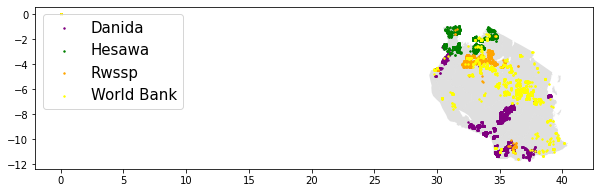

In [19]:
fig,ax = plt.subplots(figsize = (10,10))
map_data.plot(ax=ax, alpha = .25, color = 'grey')
#geo_df[geo_df['funder']== 'Government of Tanzania'].plot(ax = ax, markersize = 2, color='blue', marker = 'o',label = 'TZ Gov')
geo_df[geo_df['funder']== 'Danida'].plot(ax=ax,markersize=2,color='purple', marker = 'o',label = 'Danida')
geo_df[geo_df['funder']== 'Hesawa'].plot(ax=ax,markersize=2,color='green', marker = 'o',label = 'Hesawa')
geo_df[geo_df['funder']== 'Rwssp'].plot(ax=ax,markersize=2,color='orange', marker = 'o',label = 'Rwssp')
geo_df[geo_df['funder']== 'World Bank'].plot(ax=ax,markersize=2,color='yellow', marker = 'o',label = 'World Bank')
plt.legend(prop={'size':15});

In [20]:
df2.water_quality.unique()

array(['soft', 'salty', 'milky', 'unknown', 'fluoride', 'coloured',
       'salty abandoned', 'fluoride abandoned'], dtype=object)

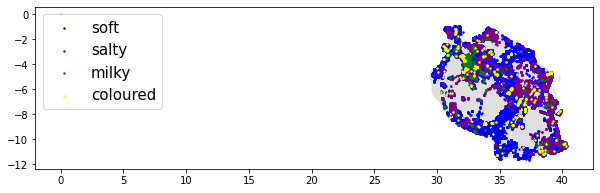

In [22]:
fig,ax = plt.subplots(figsize = (10,10))
map_data.plot(ax=ax, alpha = .25, color = 'grey')
geo_df[geo_df['water_quality']== 'soft'].plot(ax = ax, markersize = 2, color='blue', marker = 'o',label = 'soft')
geo_df[geo_df['water_quality']== 'salty'].plot(ax=ax,markersize=2,color='purple', marker = 'o',label = 'salty')
geo_df[geo_df['water_quality']== 'milky'].plot(ax=ax,markersize=2,color='green', marker = 'o',label = 'milky')
#geo_df[geo_df['water_quality']== 'flouride'].plot(ax=ax,markersize=2,color='orange', marker = 'o',label = 'flouride')
geo_df[geo_df['water_quality']== 'coloured'].plot(ax=ax,markersize=2,color='yellow', marker = 'o',label = 'coloured')
plt.legend(prop={'size':15});

going to do more exploring in a new notebook 